# RCCS オンラインスクール事前課題

1. Lorenz-96を4次のRunge-Kutta法を用いて実装する。パラメータ値Fをいろいろ変え、F=8でカオスとなることを確認する。 余裕があれば、他の時間積分スキームも実装してみる。
2. パラメータ値F=8とする。誤差の平均発達率について調べ、0.2時間ステップを1日と定義することの妥当性を確認する。


参考文献:
Lorenz, E., and K. Emanuel, 1998: Optimal sites for supplementary weather observations:Simulation with a small model. J. Atmos. Sci., 55, 399−414.

In [1]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('./')
from utils import make_lorenz96, rk4, euler

## 計算
$ X_j = F $とし，摂動として$ X_{20} $に$ 1.001 $をかける
$ X_{20} = F \cdot 1.001$

In [75]:
# J: 変数の数
J = 40

# dt: 時間刻み
dt = 0.01

# N: 時間ステップ数
# 天下り的ではあるが1年分に相当
N = 360*20

def simulate_and_plot(scheme):
    result = np.zeros((N,J))
    x = x0
    result[0] = x[:]

    for n in range(1,N):
        t = n*dt
        x = scheme(t, x, dt, lorenz)
        result[n] = x[:]

#  plot
    fig1, ax1 = plt.subplots()
    ax1.plot(result[:, 19])
    ax1.set_ylabel('$x_{20} $')
    plt.title('plot 20th component')
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot(result[:, 0], result[:, 1], result[:, 2])
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('$x_3$')
    plt.title('first three components of Lorenz96')
    plt.show()

    return result

### 4次RungeKutta

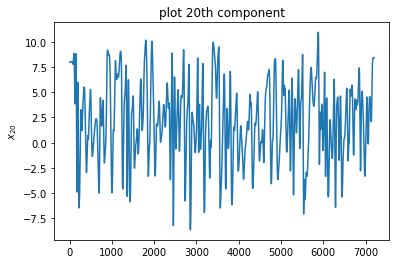

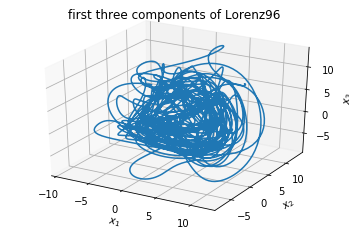

In [76]:
F = 8
x0 = F*np.ones(J)
x0[19] *= 1.001
lorenz = make_lorenz96(F)

x = simulate_and_plot(rk4)

### 誤差の平均発達率を計算

In [1]:
# M: サンプル数
M = 60
Nstep = 5*20
error = np.zeros((M,Nstep))

dt = 0.01
epsilon = 1e-3

for m in range(M):
#     半分以降の軌道からサンプル
    z = x[180*20+3*20*m, :]
    z_perturb = z + epsilon*np.random.randn(J)
    error[m, 0] = np.linalg.norm(z - z_perturb, ord=2)
    
    for n in range(1, Nstep):
        t = n*dt
        z = rk4(t, z, dt, lorenz)
        z_perturb = rk4(t, z_perturb, dt, lorenz)
        error[m, n] = np.linalg.norm(z - z_perturb, ord=2)

error_mean = error.mean(axis=0)

fig, ax = plt.subplots()
ax.plot(error_mean)
plt.grid()
_ = plt.title('error grow up')

NameError: name 'np' is not defined

In [131]:
np.array([error_mean[i+40]/error_mean[i] for i in range(5)]).mean()

2.0739587674033944

#### 考察
- 約40回ごとに誤差が2倍になっている．
- 論文によると気象学では2日で誤差が2倍になるとある．

よって$ dt = 0.01 $なので
$ 40 \times 0.01 = 2 day $から
$ 1 day = 0.2 $


In [94]:
# F = 4
# x0 = F*np.ones(J)
# x0[19] *= 1.001
# lorenz = make_lorenz96(F)

# simulate_and_plot(rk4)

In [95]:
# F = 1
# x0 = F*np.ones(J)
# x0[19] *= 1.001
# lorenz = make_lorenz96(F)

# simulate_and_plot(rk4)

## 参考
[Lorenz96モデルのデータ同化:準備編](https://qiita.com/litharge3141/items/41b8dd3104413529407f)